In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 5.0)
plt.rcParams['figure.facecolor']='w'

In [2]:
df= pd.read_excel('/content/ANZ_dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [4]:
df.columns
df.drop(['status','card_present_flag'],axis=1,inplace=True)
df.columns

Index(['bpay_biller_code', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'merchant_code', 'first_name',
       'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state',
       'extraction', 'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement'],
      dtype='object')

In [0]:
#extarct month
def get_month(val):
  return val.month
df['month']=df['date'].apply(get_month)

In [5]:
#extract weekday
def find_weekday(val):
  return val.day_name()
df['weekday']=df['date'].apply(find_weekday)
df.head()

,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,weekday
0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday
1,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday
2,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday
3,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday
4,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday


In [0]:
#extract hour
df['hour']=df['extraction'].apply(lambda val: val[11:13])

In [7]:
df['hour'].unique()

array(['01', '02', '04', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00',
       '03', '05'], dtype=object)

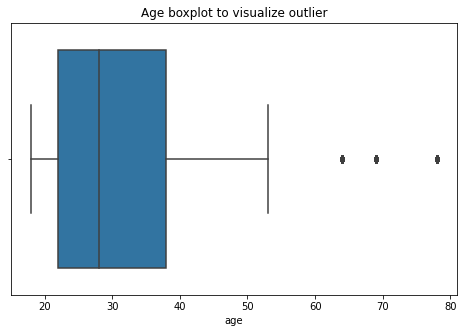

In [40]:
ax=sns.boxplot(x='age',data=df).set_title('Age boxplot to visualize outlier')

In [0]:
df_purchase = pd.DataFrame(df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')])
df_purchase

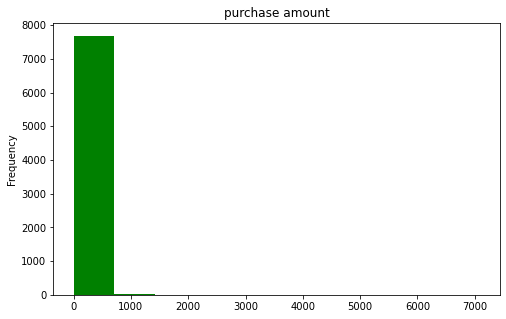

In [68]:
#ax=sns.distplot(df['amount'])
ax=df_purchase['amount'].plot(kind='hist',title='purchase amount',color='green')

In [0]:
q_low = df_purchase['amount'].quantile(0.001)
q_high = df_purchase['amount'].quantile(0.95)
df_am=df_purchase[(df_purchase['amount']<q_high) & (df_purchase['amount']>q_low)]

In [91]:
df_am

,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,weekday,hour
0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,01
1,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,01
2,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday,01
3,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday,01
4,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,Wednesday,23
12039,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,Wednesday,23
12040,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,Wednesday,23
12041,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,Wednesday,23


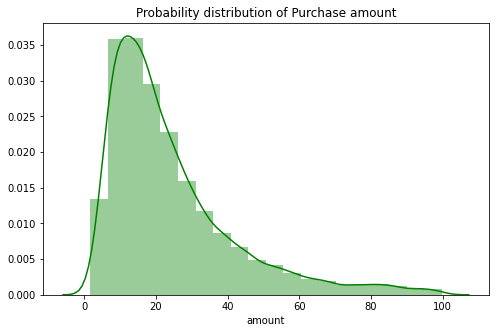

In [94]:
#removing outlier
#ax=df_am['amount'].plot(kind='hist',title='purchase amount',color='green',bins=20)
ax=sns.distplot(df_am['amount'],bins=20,hist=True,color='green').set_title('Probability distribution of Purchase amount')

In [0]:
#for cutomers monthly transaction volume
df_trans = df.groupby(by=['customer_id']).size().to_frame('transaction_c').reset_index()
df_trans['transaction_c'] = df_trans['transaction_c'].apply(lambda x:x/3)

In [121]:
type(df_trans.iloc[1,1])

numpy.float64

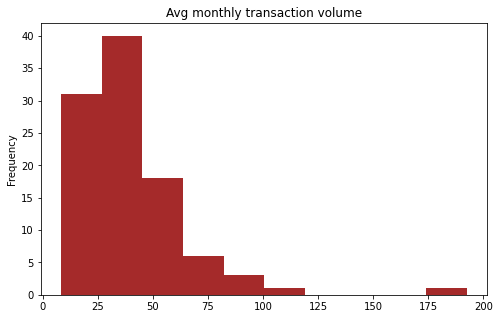

In [122]:
#graph
ax=df_trans['transaction_c'].plot(kind='hist',title='Avg monthly transaction volume',color='brown')

In [0]:
#avg weekly transaction volume
df_week = df.groupby(by=['weekday']).size().to_frame('avg_transaction').reset_index()
df_week['avg_transaction']=df_week['avg_transaction'].apply(lambda x:x/7)

In [149]:
df_week['weekday'].unique()

[Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [0]:
li=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [151]:
df_week

,weekday,avg_transaction
0,Monday,194.285714
1,Tuesday,212.428571
2,Wednesday,294.714286
3,Thursday,257.285714
4,Friday,296.142857
5,Saturday,244.142857
6,Sunday,221.428571


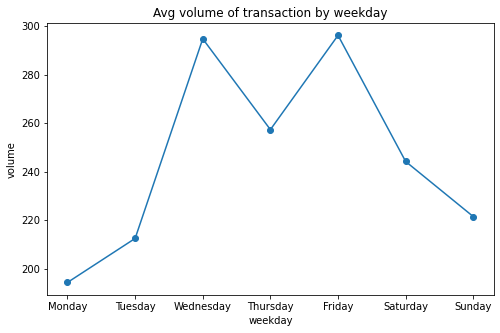

In [161]:
#ax=sns.lineplot(x='weekday',y='avg_transaction',markers="o",data=df_week)
plt.xlabel('weekday')
plt.ylabel('volume')
plt.title('Avg volume of transaction by weekday')
plt.plot(df_week['weekday'],df_week['avg_transaction'],marker='o')
plt.show()

In [167]:
  #avg transaction volume by hour
  df_hour = df.groupby(by=['date','hour']).size().to_frame('trans_vol').groupby(by=['hour'])['trans_vol'].mean().reset_index()
  df_hour

,hour,trans_vol
0,00,1.421053
1,01,2.377778
2,02,2.523810
3,03,2.361446
4,04,3.395604
5,05,2.580247
6,06,2.766667
7,07,3.093023
8,08,6.010989
9,09,12.153846


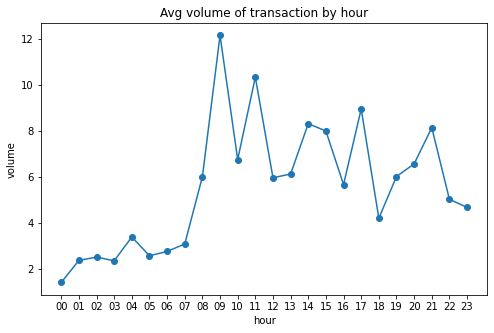

In [169]:
plt.xlabel('hour')
plt.ylabel('volume')
plt.title('Avg volume of transaction by hour')
plt.plot(df_hour['hour'],df_hour['trans_vol'],marker='o')
plt.show()